# Drug Recommendation System Using AI #

#### Introduction ####
The goal of this script is to train a deep learning model that predicts the most suitable drug for 
a given medical condition based on user reviews. It leverages natural language processing (NLP) to 
understand textual reviews and conditions, encoding them into numerical representations for deep learning.


#### Problem Statement ####
Finding the right medicine for a health condition can be difficult. 
This AI-powered system helps suggest suitable drugs based on patient 
reviews and medical conditions, using natural language processing 
and machine learning to improve healthcare recommendations

### Load Required Libraries ###

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

### Load the Dataset ###

In [3]:
data = pd.read_csv(r"C:\Users\NSTIW\Desktop\maheshwari.AI\Module6\drugsComTest_raw.csv")
print(data.head())

   uniqueID         drugName                     condition  \
0    163740      Mirtazapine                    Depression   
1    206473       Mesalamine  Crohn's Disease, Maintenance   
2    159672          Bactrim       Urinary Tract Infection   
3     39293         Contrave                   Weight Loss   
4     97768  Cyclafem 1 / 35                 Birth Control   

                                              review  rating       date  \
0  "I&#039;ve tried a few antidepressants over th...      10  28-Feb-12   
1  "My son has Crohn&#039;s disease and has done ...       8  17-May-09   
2                      "Quick reduction of symptoms"       9  29-Sep-17   
3  "Contrave combines drugs that were used for al...       9   5-Mar-17   
4  "I have been on this birth control for one cyc...       9  22-Oct-15   

   usefulCount  
0           22  
1           17  
2            3  
3           35  
4            4  


### Explore the Data ###

In [4]:
print(data.info())
print(data['condition'].value_counts().head())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     53766 non-null  int64 
 1   drugName     53766 non-null  object
 2   condition    53471 non-null  object
 3   review       53766 non-null  object
 4   rating       53766 non-null  int64 
 5   date         53766 non-null  object
 6   usefulCount  53766 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.9+ MB
None
condition
Birth Control    9648
Depression       3095
Pain             2100
Anxiety          1908
Acne             1847
Name: count, dtype: int64
uniqueID         0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64


### Data Preprocessing ###

In [5]:
data = data.dropna(subset=['condition', 'review'])

In [6]:
le = LabelEncoder()
data['drug_encoded'] = le.fit_transform(data['drugName'])

In [ ]:
5. Text Tokenization and Padding

In [7]:
# Combine condition and review as input text
data['input_text'] = data['condition'] + " " + data['review']

# Tokenize text
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(data['input_text'])

sequences = tokenizer.texts_to_sequences(data['input_text'])
padded = pad_sequences(sequences, maxlen=200, padding='post')

### Split Data for Training ###

In [8]:
X = padded
y = data['drug_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Build Deep Learning Model ###

In [9]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=64, input_length=200))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(le.classes_), activation='softmax'))  # Multi-class output

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\NSTIW\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Train the Model ###

In [10]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/5
669/669 ━━━━━━━━━━━━━━━━━━━━ 64s 91ms/step - accuracy: 0.0201 - loss: 6.8205 - val_accuracy: 0.0252 - val_loss: 6.5310
Epoch 2/5
669/669 ━━━━━━━━━━━━━━━━━━━━ 82s 91ms/step - accuracy: 0.0230 - loss: 6.4735 - val_accuracy: 0.0252 - val_loss: 6.5196
Epoch 3/5
669/669 ━━━━━━━━━━━━━━━━━━━━ 82s 92ms/step - accuracy: 0.0218 - loss: 6.4590 - val_accuracy: 0.0252 - val_loss: 6.5363
Epoch 4/5
669/669 ━━━━━━━━━━━━━━━━━━━━ 82s 92ms/step - accuracy: 0.0241 - loss: 6.4473 - val_accuracy: 0.0252 - val_loss: 6.5365
Epoch 5/5
669/669 ━━━━━━━━━━━━━━━━━━━━ 82s 92ms/step - accuracy: 0.0231 - loss: 6.4613 - val_accuracy: 0.0252 - val_loss: 6.5391


### Visualize Accuracy and Loss ###

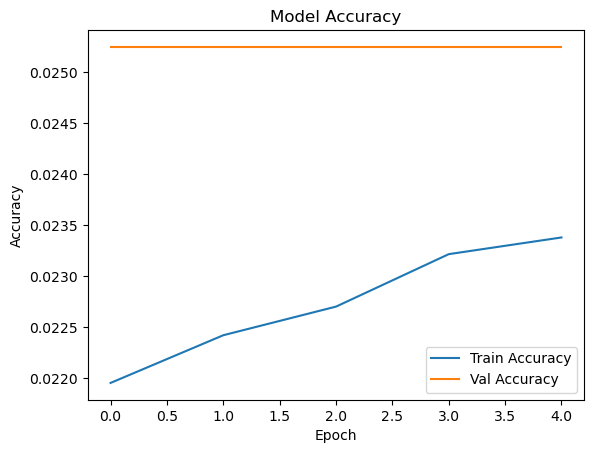

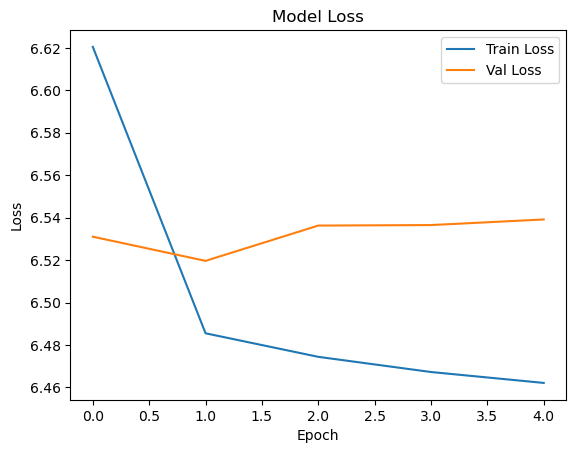

In [11]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Make Predictions ###

In [12]:
# Predict top recommended drug
sample = ["pain headache I had mild headache and this helped"]
seq = tokenizer.texts_to_sequences(sample)
padded_sample = pad_sequences(seq, maxlen=200, padding='post')
pred = model.predict(padded_sample)
top_drug = le.inverse_transform([np.argmax(pred)])

print("Recommended drug:", top_drug[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
Recommended drug: Levonorgestrel
